In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.size'] = 20
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

PDF_MODE = True

In [3]:
# all_df = pd.read_csv('./csv/compare-40-46/3GNN_40DIM.csv', sep=",")
all_df = pd.read_csv('./csv/3GNN_40DIM.csv', sep=",")
all_df

model  layer  batch  unit    Recall       TNR       ACC  Precision  \
0    gat      2      1    16  0.799480  0.999712  0.998074   0.931438   
1    gat      2      1    32  0.800900  0.999669  0.998314   0.972141   
2    gat      2      5    16  0.845183  0.999217  0.997568   0.954148   
3    gat      2      5    32  0.860890  0.999680  0.998635   0.957385   
4    gat      2     10    16  0.829434  0.999180  0.997899   0.882074   
..   ...    ...    ...   ...       ...       ...       ...        ...   
79  mpnn      3     20    32  0.841144  0.999273  0.997629   0.927848   
80  mpnn      3     25    16  0.821233  0.997981  0.994789   0.941057   
81  mpnn      3     25    32  0.848451  0.997922  0.996828   0.876154   
82  mpnn      3     30    16  0.849581  0.998235  0.996838   0.917537   
83  mpnn      3     30    32  0.858604  0.998088  0.996598   0.866083   

    F1-score  
0   0.842882  
1   0.854507  
2   0.877885  
3   0.890022  
4   0.833008  
..       ...  
79  0.866314  
80  0.848932  
81  0.844692  
82  0.863729  
83  0.843177  

[84 rows x 9 columns]

In [4]:
color = {
    'blue':'#1f77b4',
    'orange':'#ff7f0e',
    'green':'#2ca02c',
    'red':'#d62728'
}

In [5]:
BestParam = {
    'gat':{
        'layer':3,
        'unit':32,
        'batch':5,
        'zorder':[1,1,1,4],
        'color':'#d62728'
    },
    'mpnn':{
        'layer':3,
        'unit':32,
        'batch':15,
        'zorder':[1,1,1,4],
        'color':'#d62728'
    },
    'gine':{
        'layer':2,
        'unit':32,
        'batch':20,
        'zorder':[1,4,1,1],
        'color':'#ff7f0e'
    }
}

In [6]:
x = np.array([1,5,10,15,20,25,30])
models = ['gat','gine','mpnn']
evals = ['Recall','Precision','F1-score']

In [7]:
plt.rcParams['font.size'] = 30
for model in models:
    df = all_df[(all_df['model'] == model)]
    for evl in evals:
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(1, 1, 1)
        
        L2_u16 = np.array(df[(df['layer']==2) & (df['unit']==16)][evl])
        L2_u32 = np.array(df[(df['layer']==2) & (df['unit']==32)][evl])
        L3_u16 = np.array(df[(df['layer']==3) & (df['unit']==16)][evl])
        L3_u32 = np.array(df[(df['layer']==3) & (df['unit']==32)][evl])
        
        if PDF_MODE:
            ax.plot(x, L2_u16, label='\#layer=2, \#unit=16', marker='o',zorder=BestParam[model]['zorder'][0])
            ax.plot(x, L2_u32, label='\#layer=2, \#unit=32', marker='o',zorder=BestParam[model]['zorder'][1])
            ax.plot(x, L3_u16, label='\#layer=3, \#unit=16', marker='o',zorder=BestParam[model]['zorder'][2])
            ax.plot(x, L3_u32, label='\#layer=3, \#unit=32', marker='o',zorder=BestParam[model]['zorder'][3])
        else:
            ax.plot(x, L2_u16, label='#layer=2, #unit=16', marker='o',zorder=BestParam[model]['zorder'][0])
            ax.plot(x, L2_u32, label='#layer=2, #unit=32', marker='o',zorder=BestParam[model]['zorder'][1])
            ax.plot(x, L3_u16, label='#layer=3, #unit=16', marker='o',zorder=BestParam[model]['zorder'][2])
            ax.plot(x, L3_u32, label='#layer=3, #unit=32', marker='o',zorder=BestParam[model]['zorder'][3])
                
        best_x = int(BestParam[model]['batch'])
        best_y = float(df[(df['layer']==BestParam[model]['layer']) & (df['unit']==BestParam[model]['unit']) & (df['batch']==BestParam[model]['batch'])][evl])
        ax.scatter(best_x, best_y, s=400, c=BestParam[model]['color'])
        
        if (model=='gat' and evl=='Recall'):
            ax.legend(fontsize=30)
        # ax.set_xlabel("batch",fontsize=35)
        ax.set_xlabel("The number of mini-batches",fontsize=35)
        ax.set_ylabel(evl,fontsize=35)
        plt.xticks(x)
        ax.set_ylim(0.0, 1.0)

#         plt.show()
        if PDF_MODE:
            plt.savefig(f'../baseline/{model}_{evl}.pdf', bbox_inches='tight', pad_inches=0, backend='pgf')
        else:
            plt.savefig(f"./figs/40DIM/{model}_{evl}.png")
        plt.clf()

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

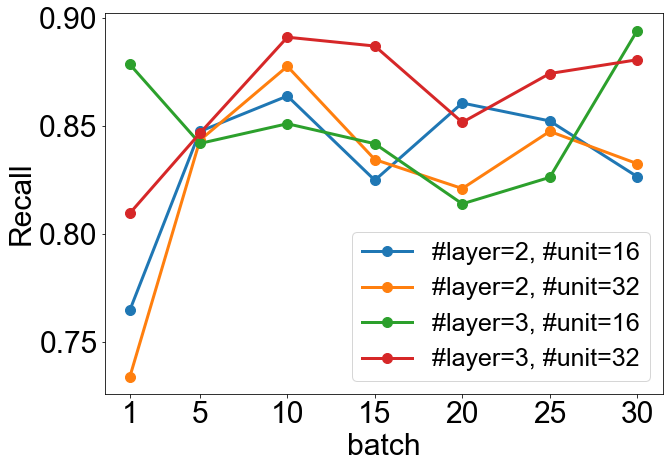

<Figure size 432x288 with 0 Axes>

In [79]:
# 見た目検証用
plt.rcParams['font.size'] = 30
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

df = all_df[(all_df['model'] == 'gat')]
evl = 'Recall'
L2_u16 = np.array(df[(df['layer']==2) & (df['unit']==16)][evl])
L2_u32 = np.array(df[(df['layer']==2) & (df['unit']==32)][evl])
L3_u16 = np.array(df[(df['layer']==3) & (df['unit']==16)][evl])
L3_u32 = np.array(df[(df['layer']==3) & (df['unit']==32)][evl])
ax.plot(x, L2_u16, label='#layer=2, #unit=16', marker='o')
ax.plot(x, L2_u32, label='#layer=2, #unit=32', marker='o')
ax.plot(x, L3_u16, label='#layer=3, #unit=16', marker='o')
ax.plot(x, L3_u32, label='#layer=3, #unit=32', marker='o')

ax.legend(fontsize=25)
ax.set_xlabel("batch")
ax.set_ylabel(evl)
plt.xticks(x)
# ax.set_ylim(0.5, 0.9)

plt.show()
plt.clf()

In [38]:
BestParam = {
    'gat':{
        'layer':3,
        'unit':16,
        'batch':30,
        'zorder':[1,1,4,1],
        'color':'green'
    },
    'mpnn':{
        'layer':2,
        'unit':16,
        'batch':30,
        'zorder':[4,1,1,1],
        'color':'orange'
    },
    'gine':{
        'layer':2,
        'unit':32,
        'batch':30,
        'zorder':[1,4,1,1],
        'color':'blue'
    }
}

In [15]:
color = {
    'blue':'#1f77b4',
    'orange':'#ff7f0e',
    'green':'#2ca02c',
    'red':'#d62728'
}

In [16]:
color['red']

'#d62728'

In [17]:
BestParam = {
    'gat':{
        'layer':3,
        'unit':16,
        'batch':30,
        'zorder':[1,1,4,1],
        'color':color['red']
    },
    'mpnn':{
        'layer':2,
        'unit':16,
        'batch':30,
        'zorder':[4,1,1,1],
        'color':'#1f77b4'
    },
    'gine':{
        'layer':2,
        'unit':32,
        'batch':30,
        'zorder':[1,4,1,1],
        'color':'#ff7f0e'
    }
}

In [18]:
BestParam['gat']['color']

'#d62728'